## Loading the data


Loading Train & Test Data

In [1]:
#importing libraries 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

wine_train = pd.read_csv("train.csv")
wine_test = pd.read_csv("test.csv")

## EDA

In [2]:
wine_train.describe()

#from the below results, it is evident that the points ranges between 80-100. 



points         price
count  82657.000000  77088.000000
mean      88.544564     36.922232
std        3.099649     43.698346
min       80.000000      4.000000
25%       86.000000     18.000000
50%       88.000000     27.000000
75%       91.000000     45.000000
max      100.000000   3300.000000

In [37]:
wine_train.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
cleaned_rev_desc          0
review_sentiment          0
Sentiment                 0
dtype: int64

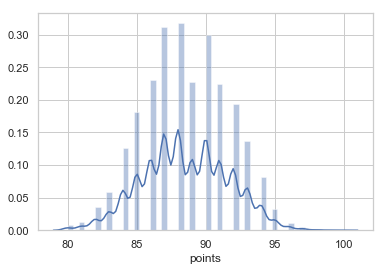

In [41]:
#wine_train.points.hist()
sns.distplot(wine_train.points)
#However, in general wine ratings are between 1-100

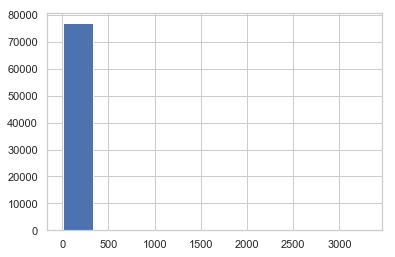

In [62]:
wine_train.price.hist()
# Even prices are skewed towards left as only 25% of wines are above 45 

In [5]:
wine_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


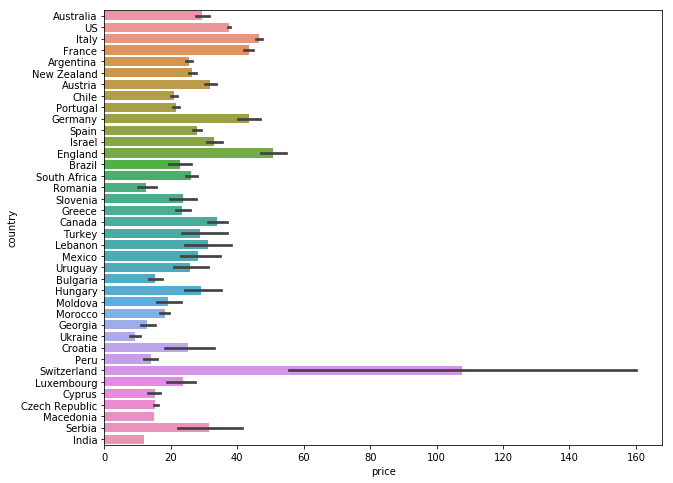

In [6]:
fig, axs = plt.subplots(figsize=(10,8))

sns.barplot(wine_train.price,wine_train.country)

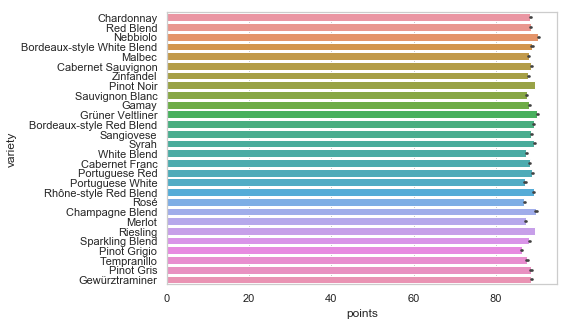

In [46]:
fig, axs = plt.subplots(figsize=(7,5))

sns.barplot(wine_train.points,wine_train.variety)

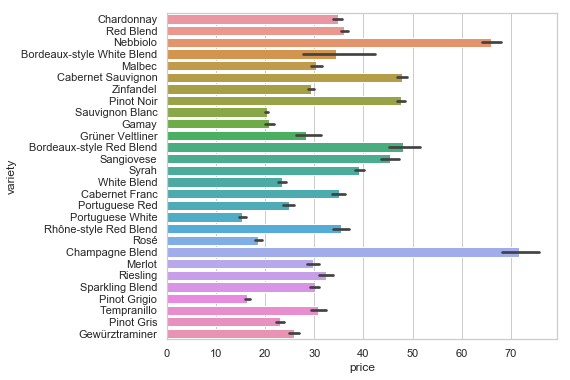

In [53]:
fig, axs = plt.subplots(figsize=(7,6))

sns.barplot(wine_train.price,wine_train.variety)

Prices of Reviewed Wine by Country, Variety

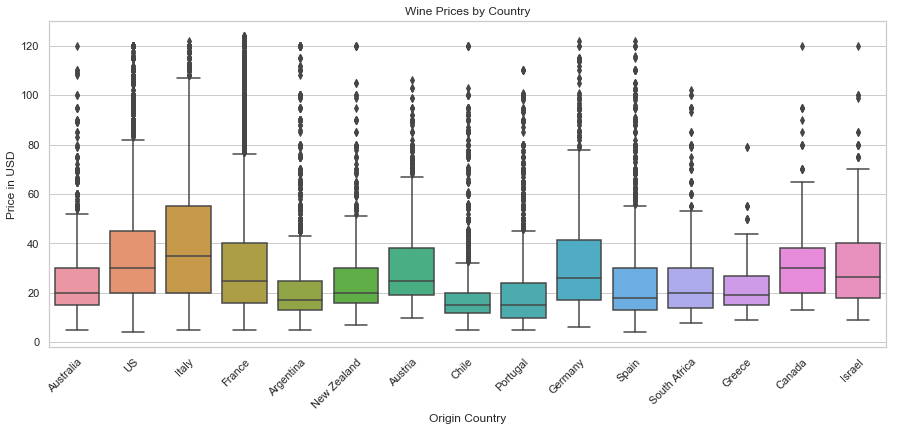

In [48]:
prices_by_country = wine_train[["price", "country"]].dropna(how = "any")
fig, axs = plt.subplots(figsize=(15,6))
# Remove all data greater than the 98th percentile
val = prices_by_country["price"].quantile(0.98)
prices_by_country = prices_by_country[prices_by_country["price"] < val]

# Only consider countries where at least 100 wines have been reviewed
prices_by_country = prices_by_country.groupby("country").filter(lambda x: (x["price"].count() >= 100))

# Creating a boxplot
ax = sns.boxplot(x="country", y = "price", data=prices_by_country)

# Setting title 
ax.set_title("Wine Prices by Country")

# Assuming prices are in USD
ax.set(xlabel = "Origin Country", ylabel = "Price in USD")

# Making sure ticks aren't overlapping
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

plt.show()

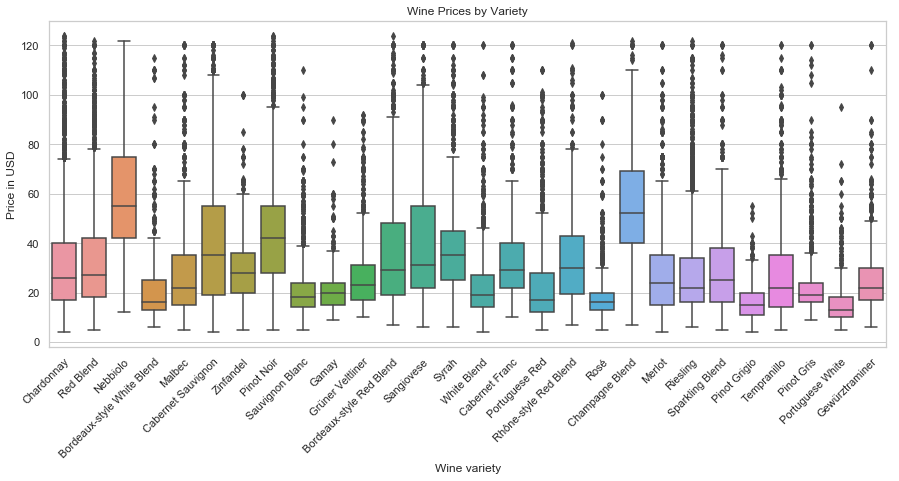

In [63]:
prices_by_variety = wine_train[["price", "variety"]].dropna(how = "any")
fig, axs = plt.subplots(figsize=(15,6))
# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
prices_by_variety = prices_by_variety[prices_by_variety["price"] < val]

# Only consider varieties where at least 500 wines have been reviewed
prices_by_variety = prices_by_variety.groupby("variety").filter(lambda x: (x["price"].count() >= 500))

# Creating a boxplot
ax = sns.boxplot(x="variety", y = "price", data=prices_by_variety)

# Setting title 
ax.set_title("Wine Prices by Variety")

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Wine variety", ylabel = "Price in USD")

# Making sure ticks aren't overlapping
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

plt.show()


Points versus Price

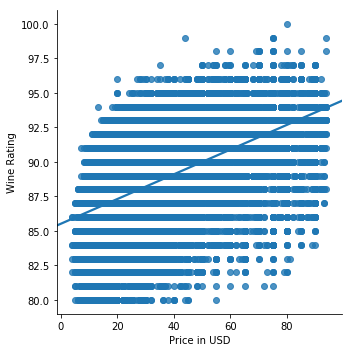

In [9]:
ratings_by_price = wine_train[["price", "points"]]

# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
ratings_by_price = ratings_by_price[ratings_by_price["price"] < val]

ax = sns.lmplot(x = "price", y = "points", data = ratings_by_price)

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Price in USD", ylabel = "Wine Rating")

plt.show()

Text Cleaning with Tokenization, Removing Stopwords and Finding Most frequently used words  

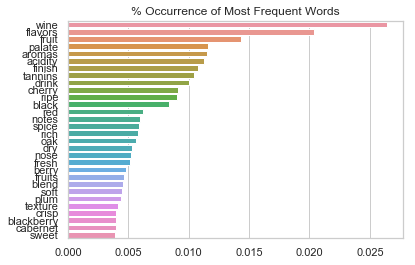

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# set seaborn style 
sns.set(style="whitegrid")

stopwords = set(stopwords.words('english'))
detokenizer = TreebankWordDetokenizer()

def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

wine_train["cleaned_rev_desc"] = wine_train["review_description"].apply(clean_description)

word_occurrence = wine_train["cleaned_rev_desc"].str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:30]/total_words

ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words")

plt.show()


Lammetization

Prefering this over Stemming

In [11]:

from textblob import Word
wine_train['cleaned_rev_desc'] = wine_train['cleaned_rev_desc'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
wine_train['cleaned_rev_desc'].head()

0    classic chardonnay aroma apple pear hay lead p...
1    wine near equal part syrah merlot balance cabe...
2    barolo conca open inky dark concentration soot...
3    impressive small addition sauvignon gris musca...
4    ripe sweet wine rich full dried fresh fruit fl...
Name: cleaned_rev_desc, dtype: object

## Advance Text Processing

Term Frequency

In [58]:
tf1 = (wine_train['cleaned_rev_desc'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

words  tf
0    lead   1
1    part   1
2   fruit   1
3  cherry   1
4    blue   1

Inverse Document Frequency

In [59]:
for i,word in enumerate(tf1['words']):
    
      tf1.loc[i, 'idf'] = np.log(wine_train.shape[0]/(len(wine_train[wine_train['cleaned_rev_desc'].str.contains(word)])))
tf1.head()

words  tf       idf
0    lead   1  3.015983
1    part   1  3.745845
2   fruit   1  0.732014
3  cherry   1  1.435097
4    blue   1  3.308781

Term Frequency – Inverse Document Frequency (TF-IDF)

In [60]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

words  tf       idf     tfidf
0    lead   1  3.015983  3.015983
1    part   1  3.745845  3.745845
2   fruit   1  0.732014  0.732014
3  cherry   1  1.435097  1.435097
4    blue   1  3.308781  3.308781

Text(0.5, 1.0, 'TF-IDF Chart')

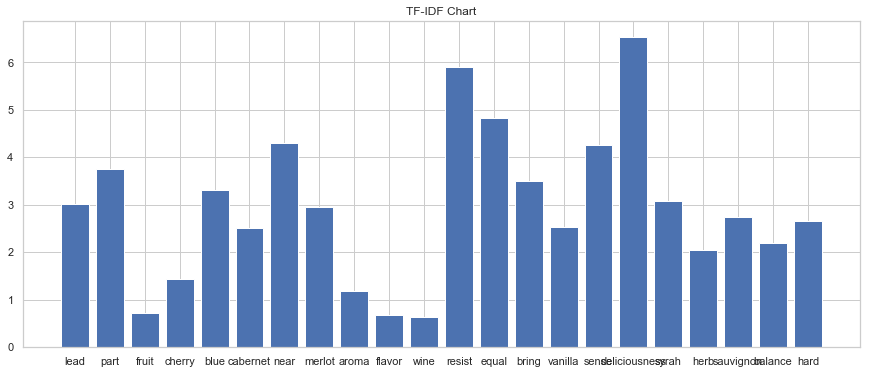

In [15]:
fig, axs = plt.subplots(figsize=(15,6))
plt.bar(tf1['words'],tf1['tfidf'])
plt.title('TF-IDF Chart')

### Bag of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(wine_train['cleaned_rev_desc'])
train_bow.shape

(82657, 1000)

## Sentiment Analysis

In [17]:
from textblob import TextBlob

wine_train['review_sentiment'] = wine_train['cleaned_rev_desc'].apply(lambda x: TextBlob(x).sentiment[0] )

wine_train[['cleaned_rev_desc','review_sentiment']]

cleaned_rev_desc  review_sentiment
0      classic chardonnay aroma apple pear hay lead p...          0.108333
1      wine near equal part syrah merlot balance cabe...         -0.047917
2      barolo conca open inky dark concentration soot...         -0.136111
3      impressive small addition sauvignon gris musca...          0.416667
4      ripe sweet wine rich full dried fresh fruit fl...          0.265476
...                                                  ...               ...
82652  hot earth baked cherry mild vanilla aroma come...          0.190556
82653  pungent note turmeric dried flower hit nose fi...         -0.050000
82654  wine lively fruity weight structure well keepi...          0.278788
82655  impressive wine already show sign potential el...          0.226190
82656  big rich vital cabernet immediate attraction d...          0.216667

[82657 rows x 2 columns]

### Analysis of Sentiment Score

In [18]:
wine_train['review_sentiment'].describe()

count    82657.000000
mean         0.154942
std          0.178867
min         -0.800000
25%          0.033333
50%          0.150000
75%          0.271429
max          1.000000
Name: review_sentiment, dtype: float64

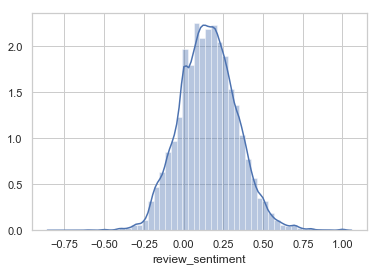

In [19]:
#wine_train.review_sentiment.hist()
sns.distplot(wine_train.review_sentiment)

In [61]:
avg_rev=wine_train.groupby("variety").agg(np.mean)
avg_rev.head()

points      price  review_sentiment
variety                                                           
Bordeaux-style Red Blend    89.102601  47.988674          0.141811
Bordeaux-style White Blend  88.692941  34.422868          0.247354
Cabernet Franc              88.191781  34.932701          0.130907
Cabernet Sauvignon          88.581303  47.841416          0.120619
Champagne Blend             89.723742  71.593011          0.235309

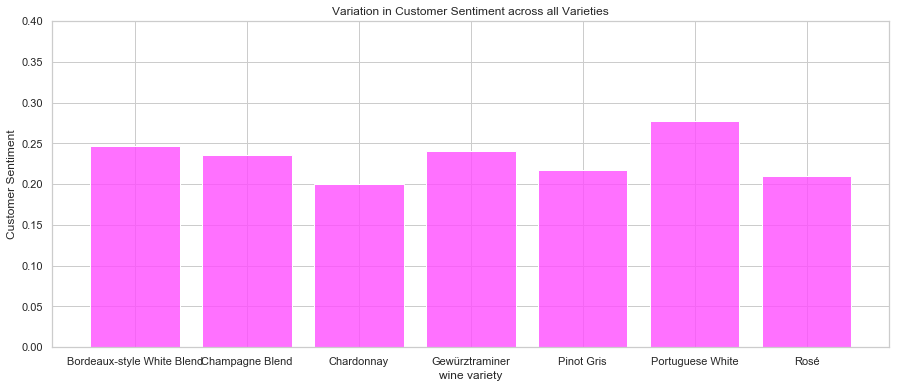

In [21]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(15,6))

avg_rev = avg_rev[avg_rev['review_sentiment']>0.2] # Considering values above 0.2 to avoid the overlapping in plots

height = avg_rev.review_sentiment
bars = avg_rev.index
y_pos = y_pos = np.arange(len(bars))

 
# Create bars and choose color
plt.bar(y_pos, height, color = (1,0.3,1,0.8))
 
# Add title and axis names
plt.title('Variation in Customer Sentiment across all Varieties')
plt.xlabel('wine variety')
plt.ylabel('Customer Sentiment')
 
# Limits for the Y axis
plt.ylim(0,0.4)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


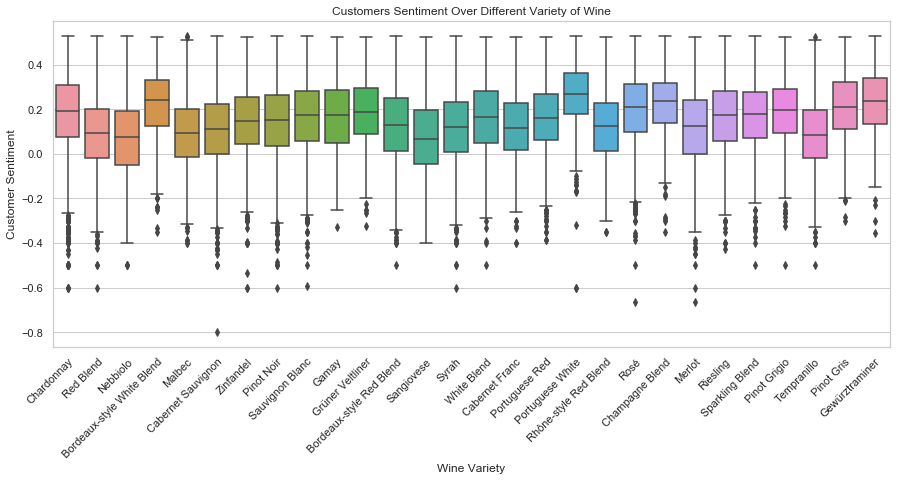

In [56]:
sent_by_variety = wine_train[["review_sentiment", "variety"]].dropna(how = "any")
fig, axs = plt.subplots(figsize=(15,6))
# Remove all data greater than the 98th percentile
val = sent_by_variety["review_sentiment"].quantile(0.98)
sent_by_variety = sent_by_variety[sent_by_variety["review_sentiment"] < val]

# Only consider varieties where at least 100 wines have been reviewed
sent_by_variety = sent_by_variety.groupby("variety").filter(lambda x: (x["review_sentiment"].count() >= 100))

# Creating a boxplot
ax = sns.boxplot(x="variety", y = "review_sentiment", data=sent_by_variety)

# Setting title 
ax.set_title("Customers Sentiment Over Different Variety of Wine")

# Assuming prices are in USD
ax.set(xlabel = "Wine Variety", ylabel = "Customer Sentiment")

# Making sure ticks aren't overlapping
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

plt.show()

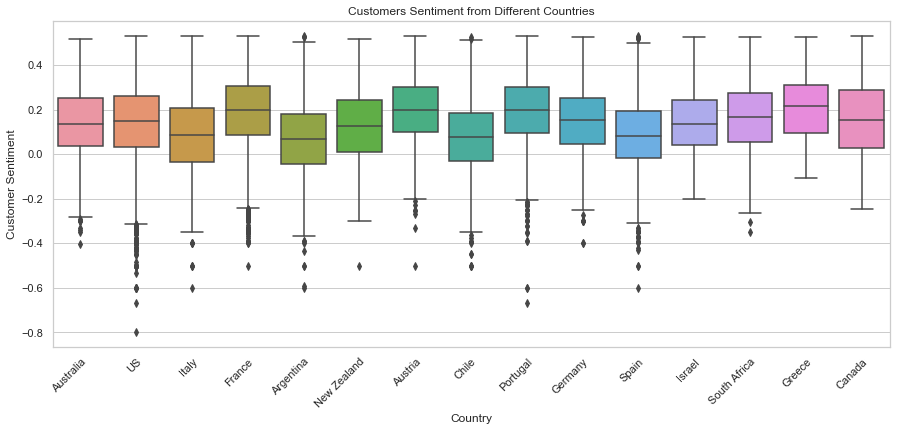

In [57]:
sent_by_variety = wine_train[["review_sentiment", "country"]].dropna(how = "any")
fig, axs = plt.subplots(figsize=(15,6))
# Remove all data greater than the 98th percentile
val = sent_by_variety["review_sentiment"].quantile(0.98)
sent_by_variety = sent_by_variety[sent_by_variety["review_sentiment"] < val]

# Only consider varieties where at least 100 wines have been reviewed
sent_by_variety = sent_by_variety.groupby("country").filter(lambda x: (x["review_sentiment"].count() >= 100))

# Creating a boxplot
ax = sns.boxplot(x="country", y = "review_sentiment", data=sent_by_variety)

# Setting title 
ax.set_title("Customers Sentiment from Different Countries")

# Assuming prices are in USD
ax.set(xlabel = "Country", ylabel = "Customer Sentiment")

# Making sure ticks aren't overlapping
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

plt.show()

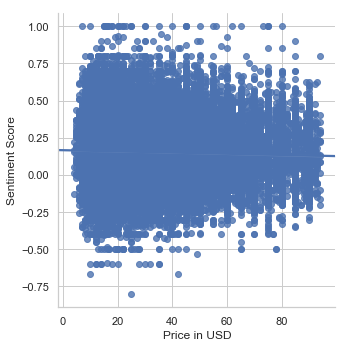

In [23]:
ratings_by_price = wine_train[["price", "review_sentiment"]]

# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
ratings_by_price = ratings_by_price[ratings_by_price["price"] < val]

ax = sns.lmplot(x = "price", y = "review_sentiment", data = ratings_by_price)

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Price in USD", ylabel = "Sentiment Score")

plt.show()

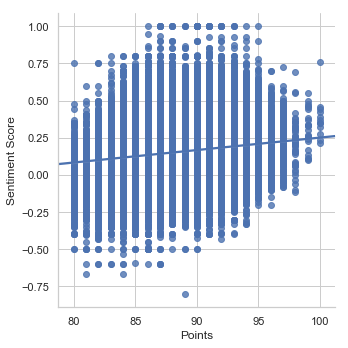

In [24]:
ratings_by_price = wine_train[["points", "review_sentiment"]]


ax = sns.lmplot(x = "points", y = "review_sentiment", data = ratings_by_price)

# Assuming prices are in USD since its an American website
ax.set(xlabel = "Points", ylabel = "Sentiment Score")

plt.show()

In [25]:
sent_list=[]

for i in wine_train.review_sentiment:
    if i>0:
        sent_list.append("Positive")
    elif i==0:
        sent_list.append("Neutral")
    else:
        sent_list.append("Negetive")
        
wine_train['Sentiment']= pd.DataFrame(sent_list)

In [26]:
df = wine_train[['variety','Sentiment']]

In [27]:
sent_counts=df.groupby('variety')['Sentiment'].value_counts()

In [28]:
counts_df = pd.DataFrame(sent_counts)
counts_df

Sentiment
variety                    Sentiment           
Bordeaux-style Red Blend   Positive        4250
                           Negetive        1144
                           Neutral          103
Bordeaux-style White Blend Positive         794
                           Negetive          40
...                                         ...
White Blend                Negetive         248
                           Neutral           70
Zinfandel                  Positive        1818
                           Negetive         340
                           Neutral           51

[84 rows x 1 columns]

Writing Dataframe to Excel file 

In [77]:
#wine_train.to_excel("new_train.xlsx")
cnt = pd.DataFrame(wine_train.Sentiment.value_counts())
cnt

Sentiment
Positive      65919
Negetive      14938
Neutral        1800

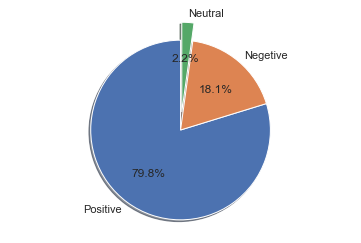

In [83]:
import matplotlib.pyplot as plt

labels = cnt.index
sizes = cnt.Sentiment
explode = (0, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()